In [4]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import mplsoccer
from mplsoccer.pitch import Pitch, VerticalPitch

In [5]:
text_color = 'w'

In [6]:
base_url = 'https://understat.com/match/'
match = str(input('Enter match id:'))
url = base_url + match

Enter match id:18343


In [7]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')


In [8]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22498413\x22,\x22minute\x22\x3A\x2219\x22,\x22result\x22\x3A\x22BlockedShot\x22,\x22X\x22\x3A\x220.7609999847412109\x22,\x22Y\x22\x3A\x220.5209999847412109\x22,\x22xG\x22\x3A\x220.0230044424533844\x22,\x22player\x22\x3A\x22Mason\x20Mount\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x227768\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222022\x22,\x22shotType\x22\x3A\x22RightFoot\x22,\x22match_id\x22\x3A\x2218343\x22,\x22h_team\x22\x3A\x22Chelsea\x22,\x22a_team\x22\x3A\x22Arsenal\x22,\x22h_goals\x22\x3A\x220\x22,\x22a_goals\x22\x3A\x221\x22,\x22date\x22\x3A\x222022\x2D11\x2D06\x2012\x3A00\x3A00\x22,\x22player_assisted\x22\x3A\x22Kai\x20Havertz\x22,\x22lastAction\x22\x3A\x22Pass\x22\x7D,\x7B\x22id\x22\x3A\x22498415\x22,\x22minute\x22\x3A\x2231\x

In [9]:
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")

In [10]:
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
x = []
y = []
xg = []
result = []
team = []
data_away = data['a']
data_home = data['h']

In [11]:
data


{'h': [{'id': '498413',
   'minute': '19',
   'result': 'BlockedShot',
   'X': '0.7609999847412109',
   'Y': '0.5209999847412109',
   'xG': '0.0230044424533844',
   'player': 'Mason Mount',
   'h_a': 'h',
   'player_id': '7768',
   'situation': 'OpenPlay',
   'season': '2022',
   'shotType': 'RightFoot',
   'match_id': '18343',
   'h_team': 'Chelsea',
   'a_team': 'Arsenal',
   'h_goals': '0',
   'a_goals': '1',
   'date': '2022-11-06 12:00:00',
   'player_assisted': 'Kai Havertz',
   'lastAction': 'Pass'},
  {'id': '498415',
   'minute': '31',
   'result': 'MissedShots',
   'X': '0.93',
   'Y': '0.46799999237060547',
   'xG': '0.11124227195978165',
   'player': 'Thiago Silva',
   'h_a': 'h',
   'player_id': '3288',
   'situation': 'FromCorner',
   'season': '2022',
   'shotType': 'Head',
   'match_id': '18343',
   'h_team': 'Chelsea',
   'a_team': 'Arsenal',
   'h_goals': '0',
   'a_goals': '1',
   'date': '2022-11-06 12:00:00',
   'player_assisted': 'Mason Mount',
   'lastAction': 'C

In [12]:
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'xG':
            xg.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'xG':
            xg.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])

In [13]:
col_names = ['x', 'y', 'xg', 'result', 'team']
df = pd.DataFrame([x, y, xg, result, team], index=col_names)
data = df.T

In [16]:
data

,x,y,xg,result,team
0,0.76099998474121090.76099998474121090.76099998...,0.5209999847412109,0.0230044424533844,BlockedShot,Chelsea
1,0.930.930.930.930.930.930.930.930.930.930.930....,0.46799999237060547,0.11124227195978165,MissedShots,Chelsea
2,0.91199996948242190.91199996948242190.91199996...,0.2989999961853027,0.05428718402981758,SavedShot,Chelsea
3,0.8950.8950.8950.8950.8950.8950.8950.8950.8950...,0.6719999694824219,0.05581135302782059,BlockedShot,Chelsea
4,0.86300003051757810.86300003051757810.86300003...,0.6719999694824219,0.03446928411722183,BlockedShot,Chelsea
5,0.76800003051757810.76800003051757810.76800003...,0.37,0.014823352918028831,MissedShots,Arsenal
6,0.87300003051757810.87300003051757810.87300003...,0.3320000076293945,0.06227795407176018,MissedShots,Arsenal
7,0.80800003051757810.80800003051757810.80800003...,0.7369999694824219,0.02072419784963131,MissedShots,Arsenal
8,0.8650.8650.8650.8650.8650.8650.8650.8650.8650...,0.5359999847412109,0.12056536972522736,BlockedShot,Arsenal
9,0.93300003051757810.93300003051757810.93300003...,0.4370000076293945,0.2981806993484497,MissedShots,Arsenal


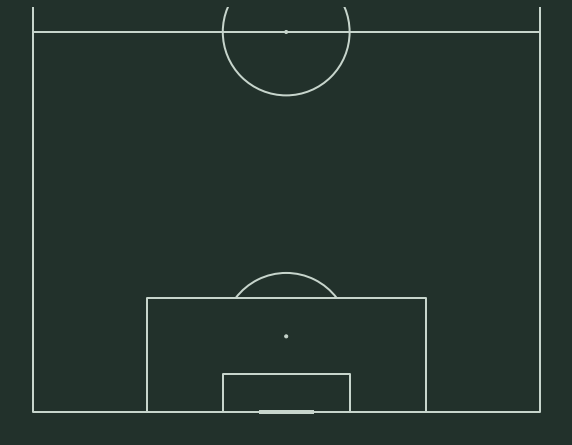

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch = VerticalPitch(pitch_type='statsbomb',half=True, pitch_color='#22312b', line_color='#c7d5cc')
#fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
#fig.set_facecolor('#22312b')
pitch.draw(ax=ax)
plt.gca().invert_yaxis()
plt.scatter(data['x'], data['y'],c='#ea6969', s=100)